In [ ]:
%%script false --no-raise-error
<div class="text-box bulleted">
    <h1 class="header">How to view analysis of your own data</h1>
    <p class="text">Go to your <a href="https://www.spotify.com/in-en/account/privacy/" target="_blank" rel="noopener noreferrer">Spotify Account page</a><sup>(1)</sup>.</p>
    <p class="text">Request <em>Extended Streaming History</em> and wait for it to get compiled and sent by Spotify.</p>
    <p class="text">Import the zip file (<i>my_spotify_data.zip</i>) into the same directory as this notebook, or change the path below (<i>zip_path</i>).</p> 
    <p class="text">Run all cells or run run <em>build.sh</em> to run and compile the notebook into a viewable html</p>
</div>
<div class="text-box">
    <p class="text">(1) https://www.spotify.com/in-en/account/privacy/</p>
</div>

In [ ]:
import pandas as pd
# Prevent wrapping of dataframes when printed
pd.set_option("display.expand_frame_repr", False)

from utils.plots import Plots

In [ ]:
from utils.process_zip import SongAttributes
from utils.process_zip import process_zip

zip_path = "./data/divij.zip"
filters: list[SongAttributes] = [
    "ts",
    "ms_played",
    "master_metadata_track_name",
    "master_metadata_album_artist_name",
    "master_metadata_album_album_name",
    "spotify_track_uri",
]

compiled_json_path = process_zip(zip_path, filters)
df = pd.read_json(compiled_json_path)

# Converting the ts column to datetime object
df["ts"] = pd.to_datetime(df["ts"])

Filename divij
zip_extract_path='./data/divij'


In [ ]:
# Saving to csv
csv = df.head().to_csv()
print(csv)

,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri
0,2023-06-25 04:54:28+00:00,1454,L-O-V-E,Nat King Cole,L-O-V-E,spotify:track:4QxDOjgpYtQDxxbWPuEJOy
1,2023-06-25 04:57:08+00:00,161560,Johnny B. Goode,Chuck Berry,Berry Is On Top,spotify:track:2QfiRTz5Yc8DdShCxG1tB2
2,2023-06-25 04:59:33+00:00,62277,Only the Lonely,Roy Orbison,Sings Lonely and Blue,spotify:track:0PkBTqRtN25z3oKasWoKlj
3,2023-06-25 05:17:46+00:00,1568,Under Pressure - Remastered 2011,Queen,Hot Space,spotify:track:2fuCquhmrzHpu5xcA1ci9x
4,2023-06-25 05:41:36+00:00,4390,Satyam Shivam Sundaram-Pt. 1,Lata Mangeshkar,Satyam Shivam Sundaram,spotify:track:4C5M9Pp2InuhCrmwhmiwkm



In [ ]:
# df = df[df["ts"].dt.year >= 2024]

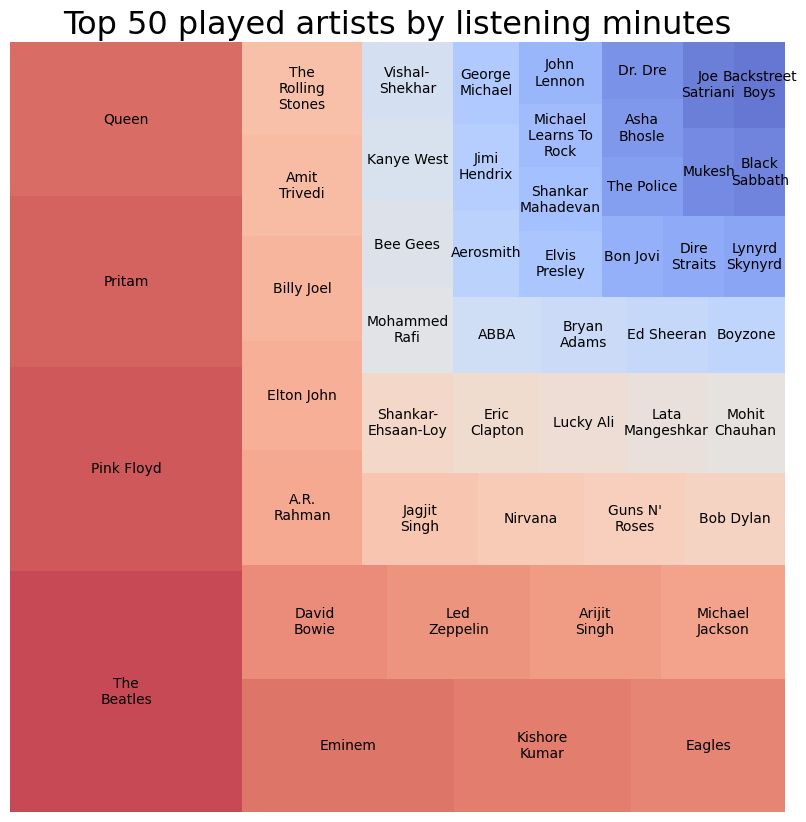

In [ ]:
Plots.top_n_artists_by_playtime(df, 50)

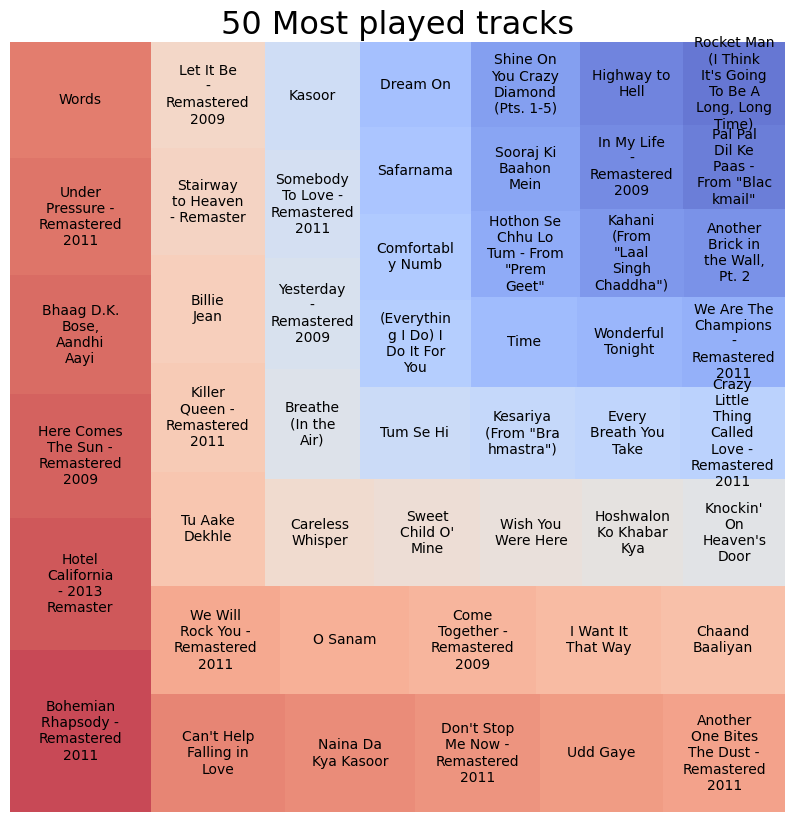

In [ ]:
Plots.top_n_tracks_by_playcount(df, 50)

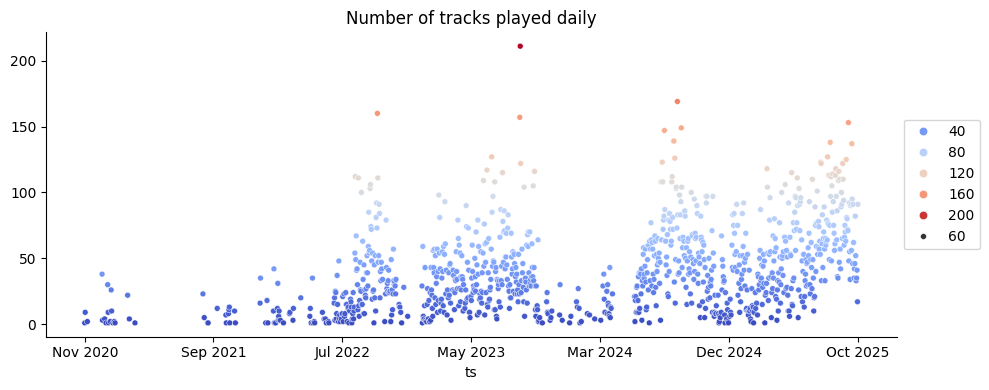

In [ ]:
# Scatter plot
Plots.daily_tracks_graph(df)

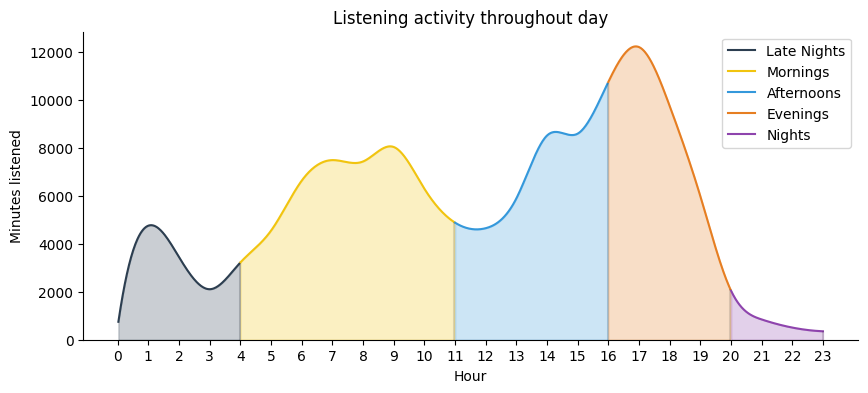

In [ ]:
# Line plot
Plots.daily_listening_activity(df)

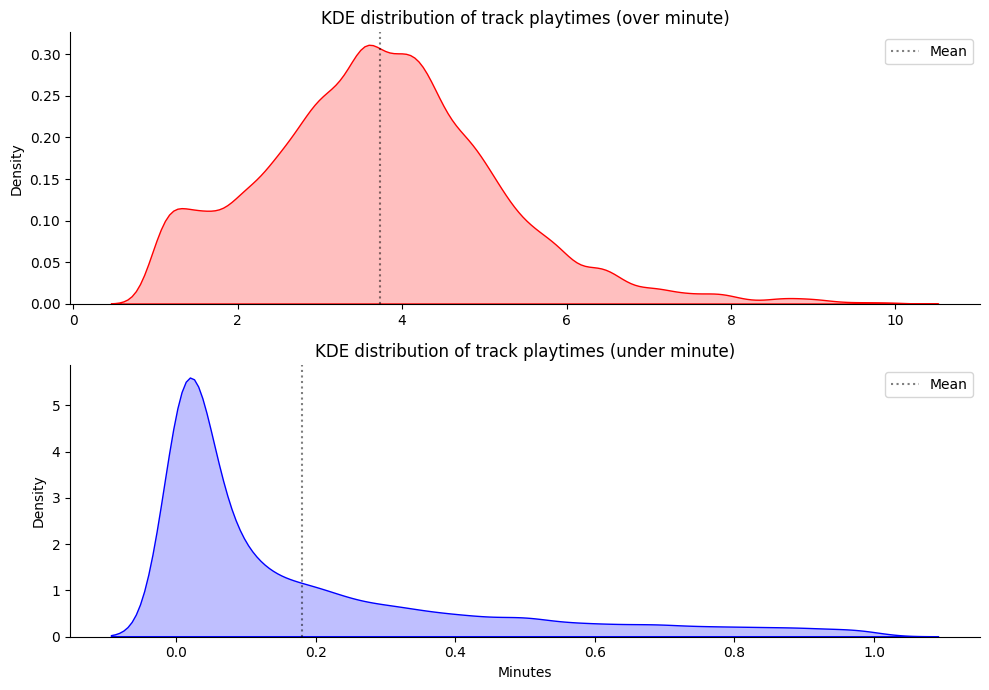

In [ ]:
# Line plot
Plots.track_playtime_kde_dist(df)

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


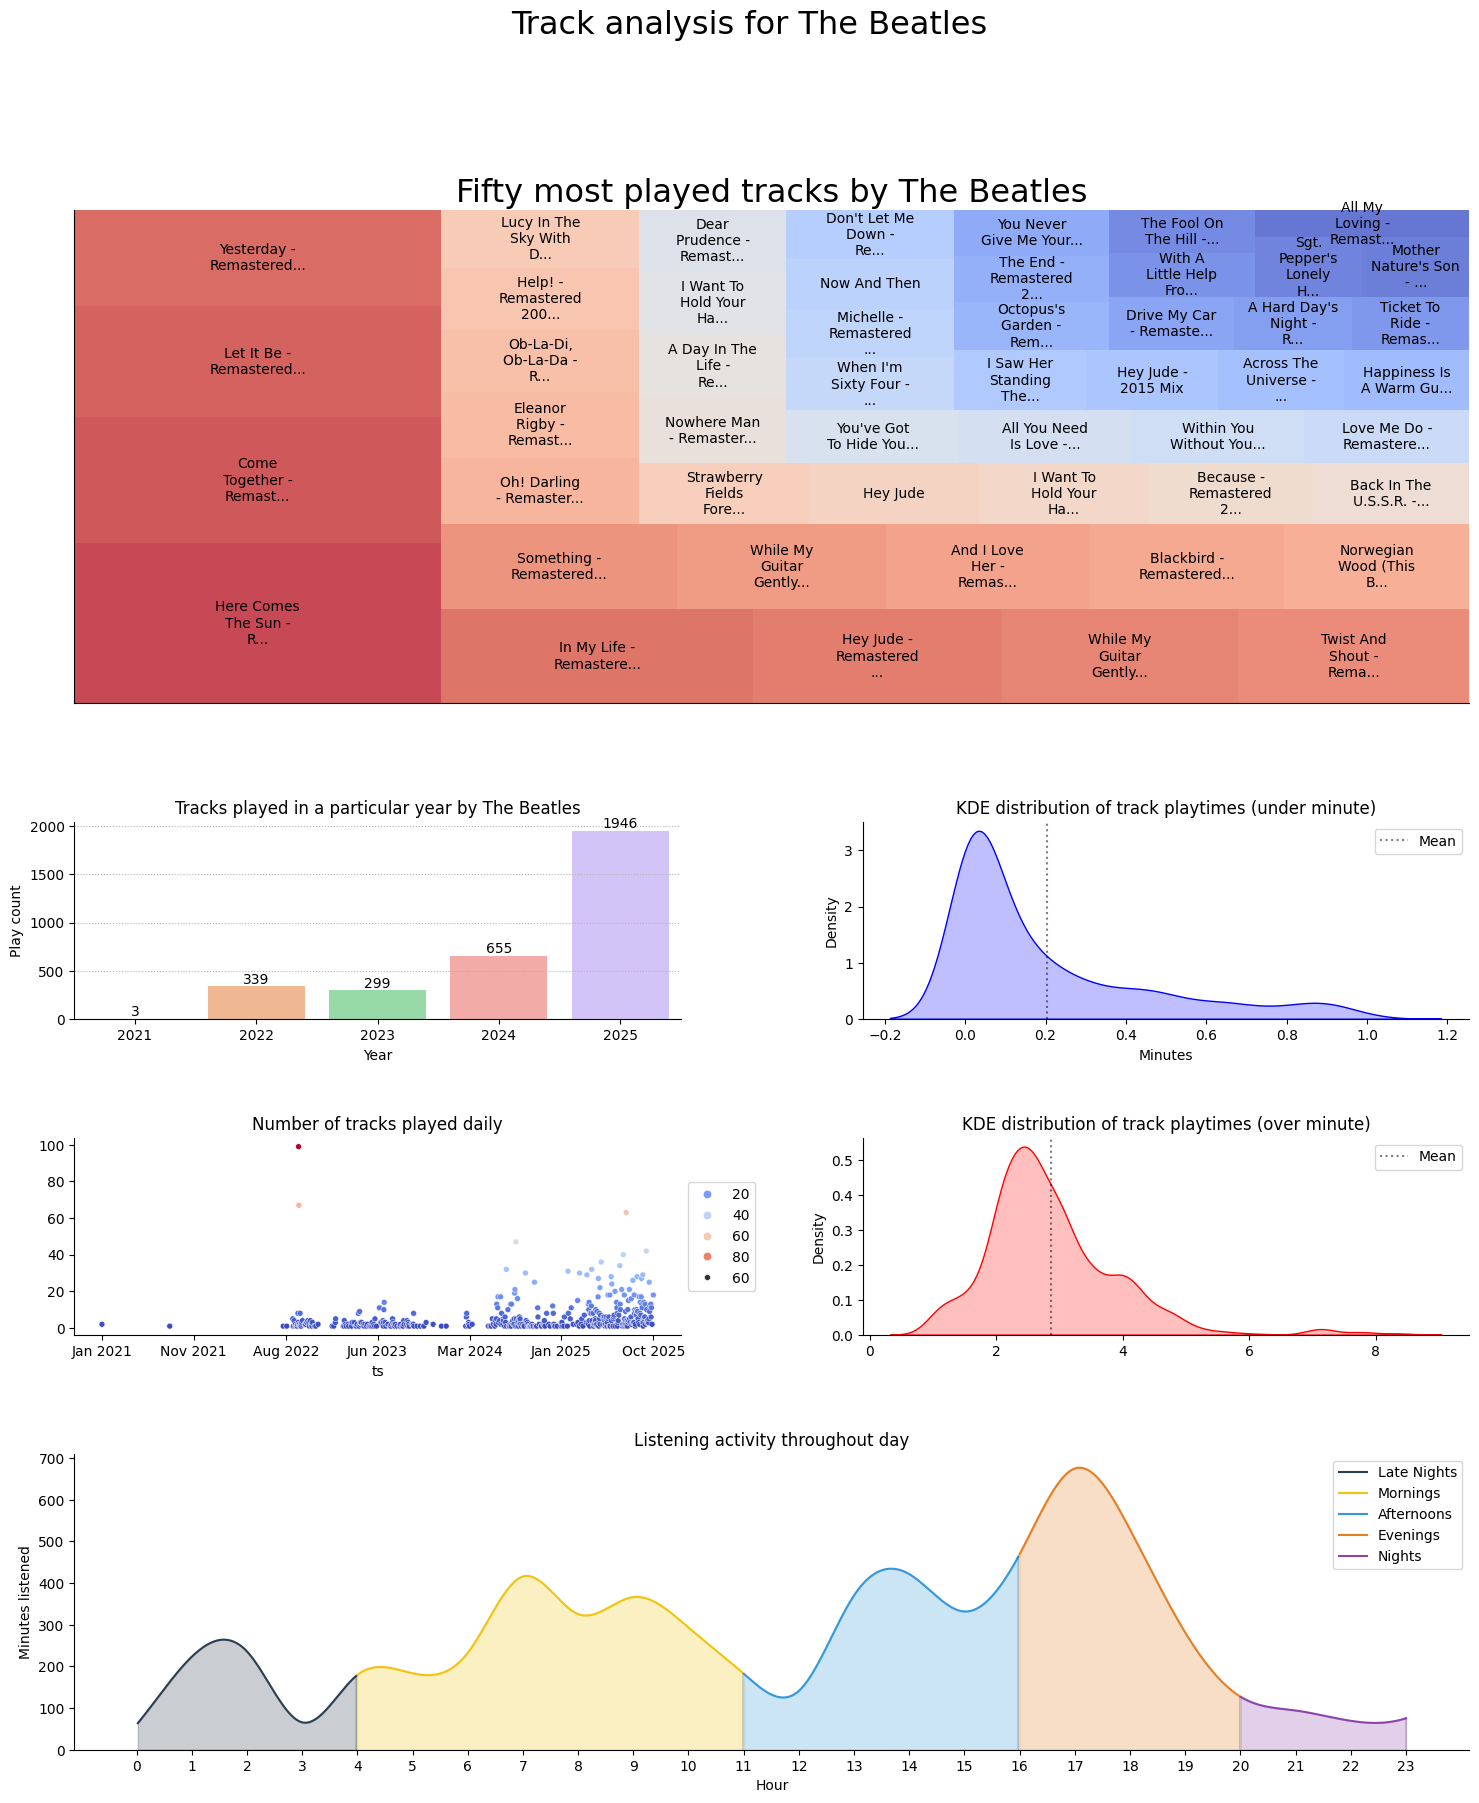

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


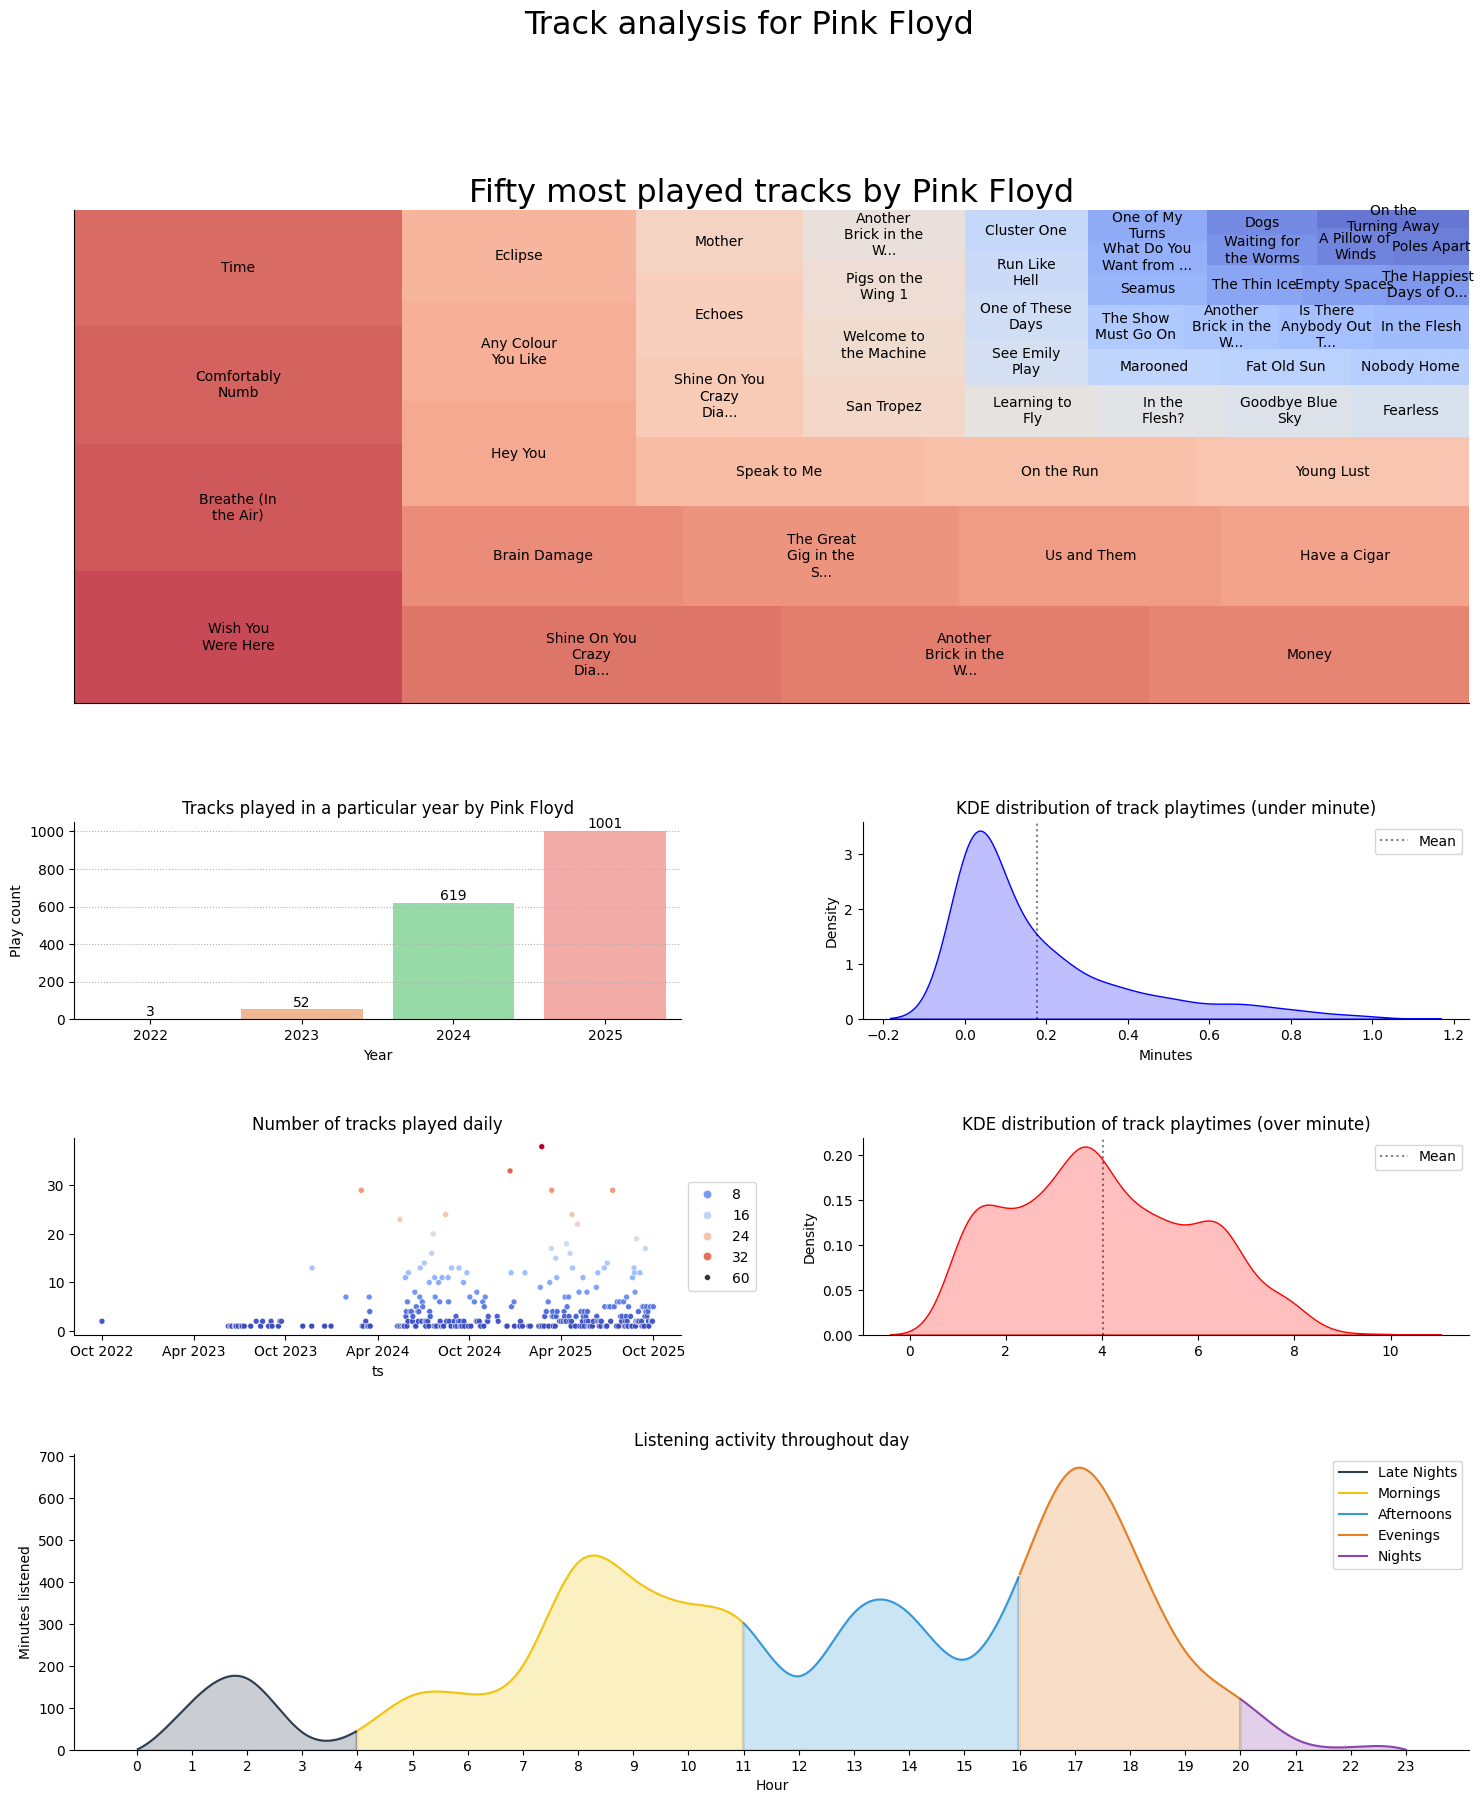

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


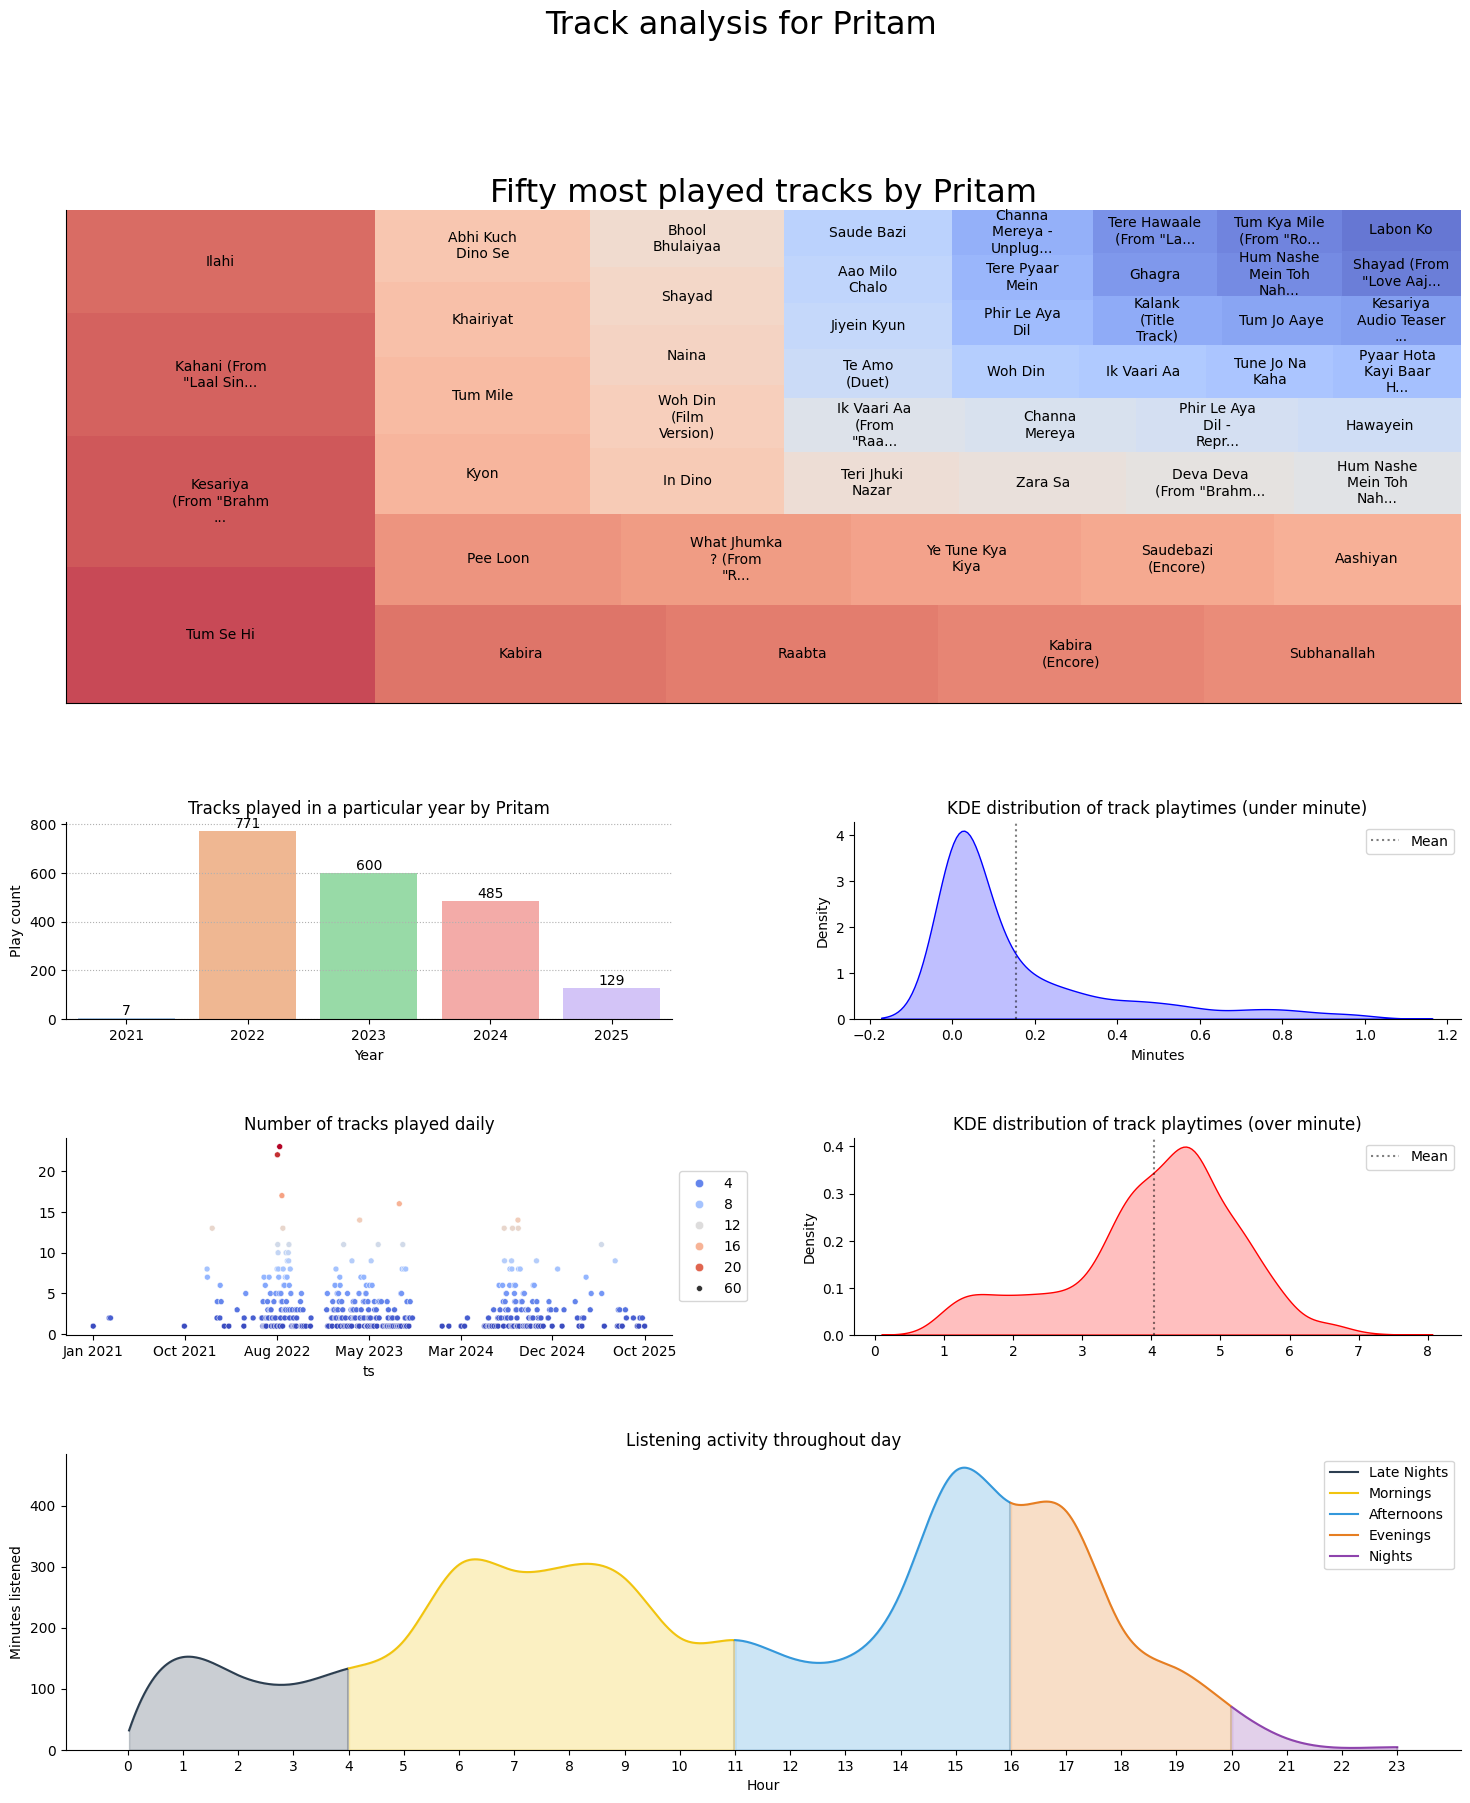

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


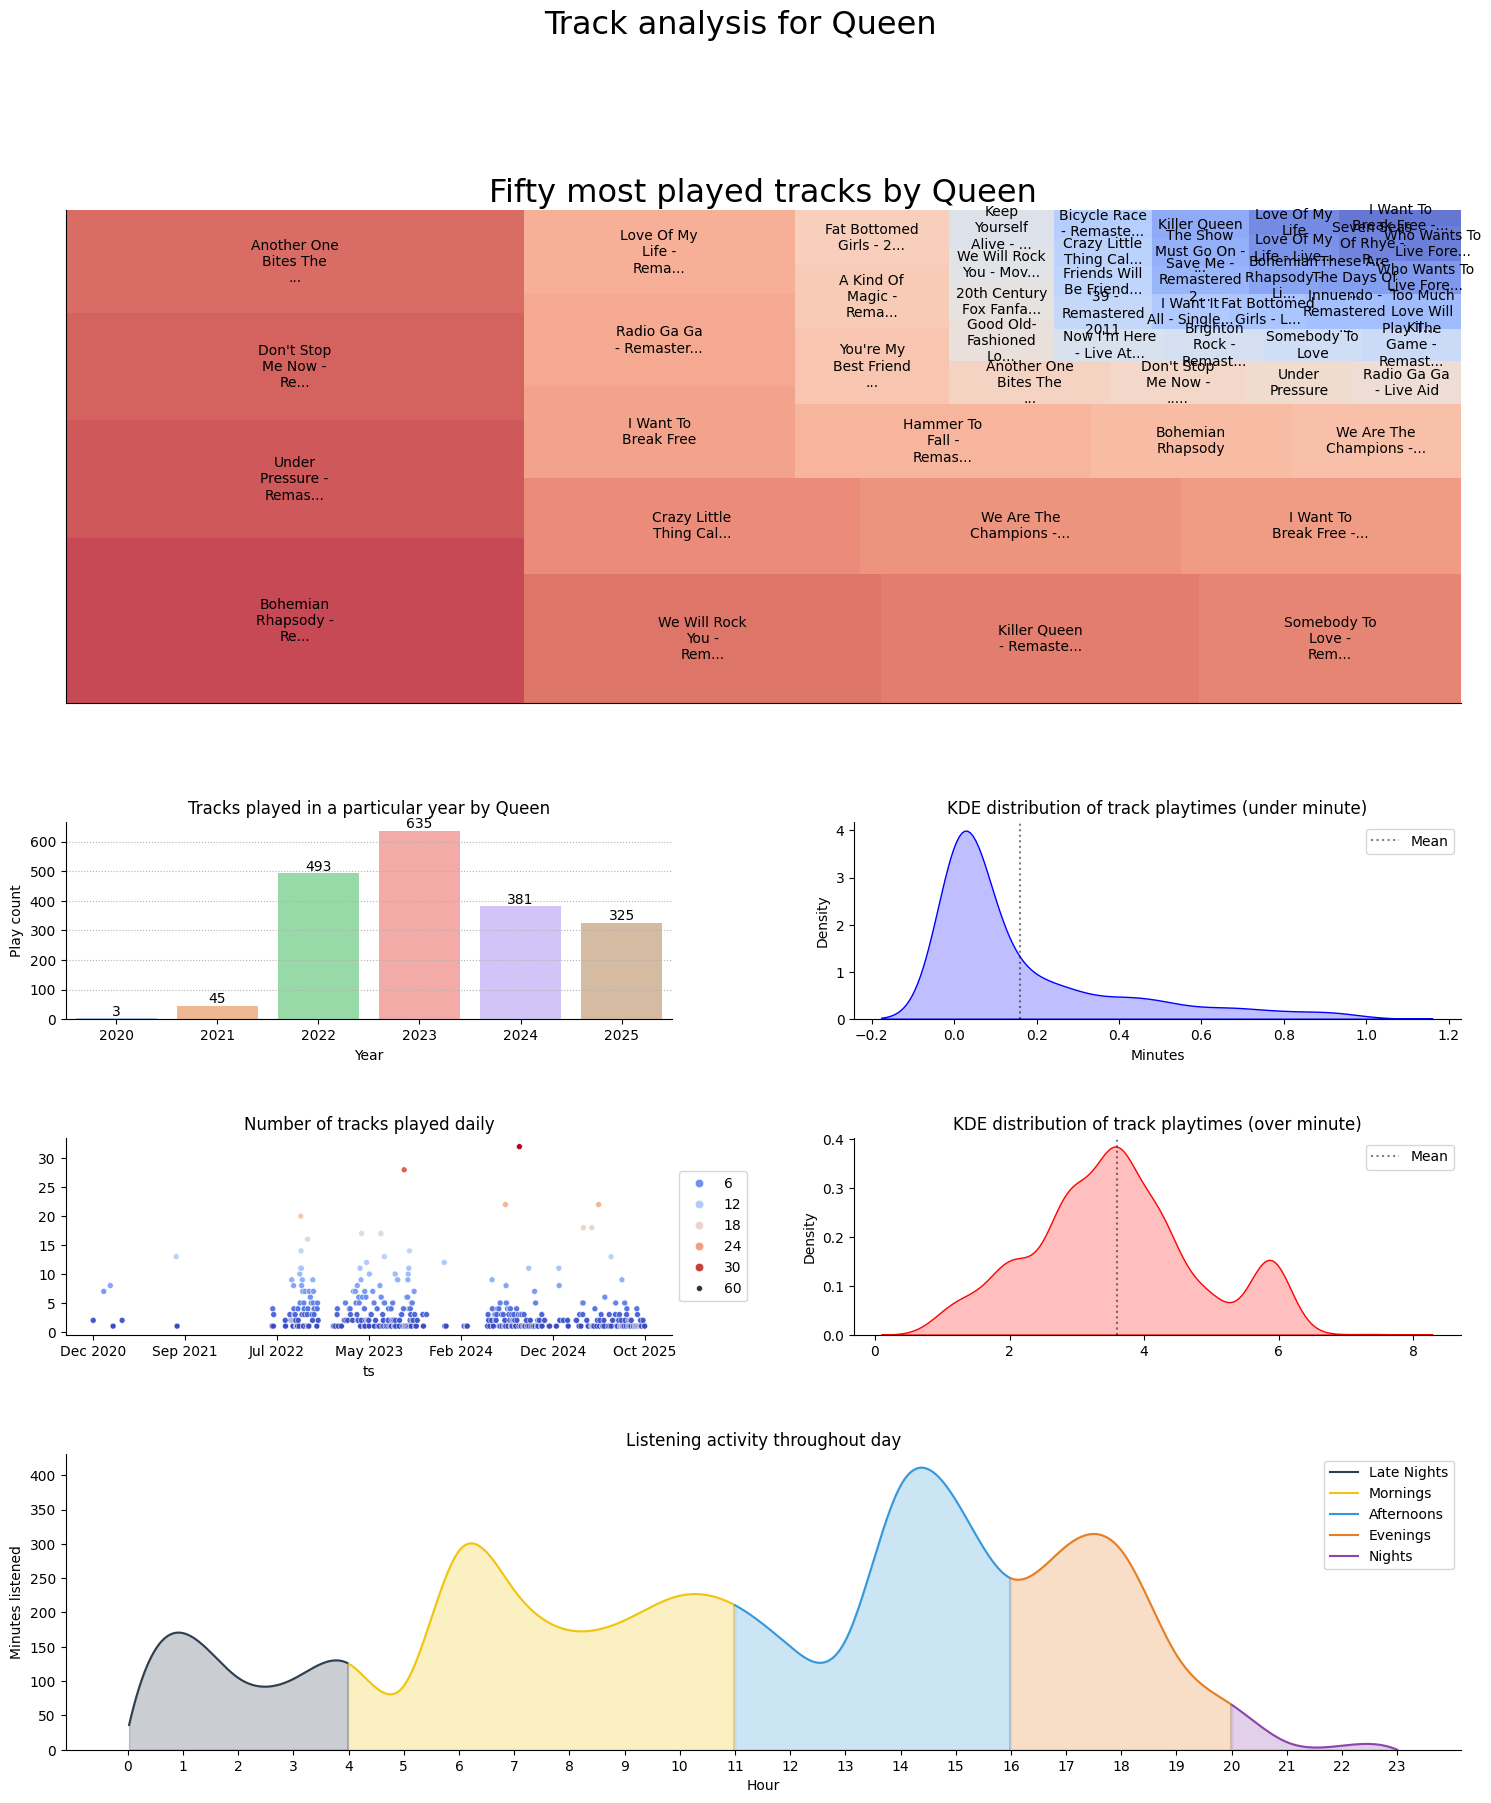

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


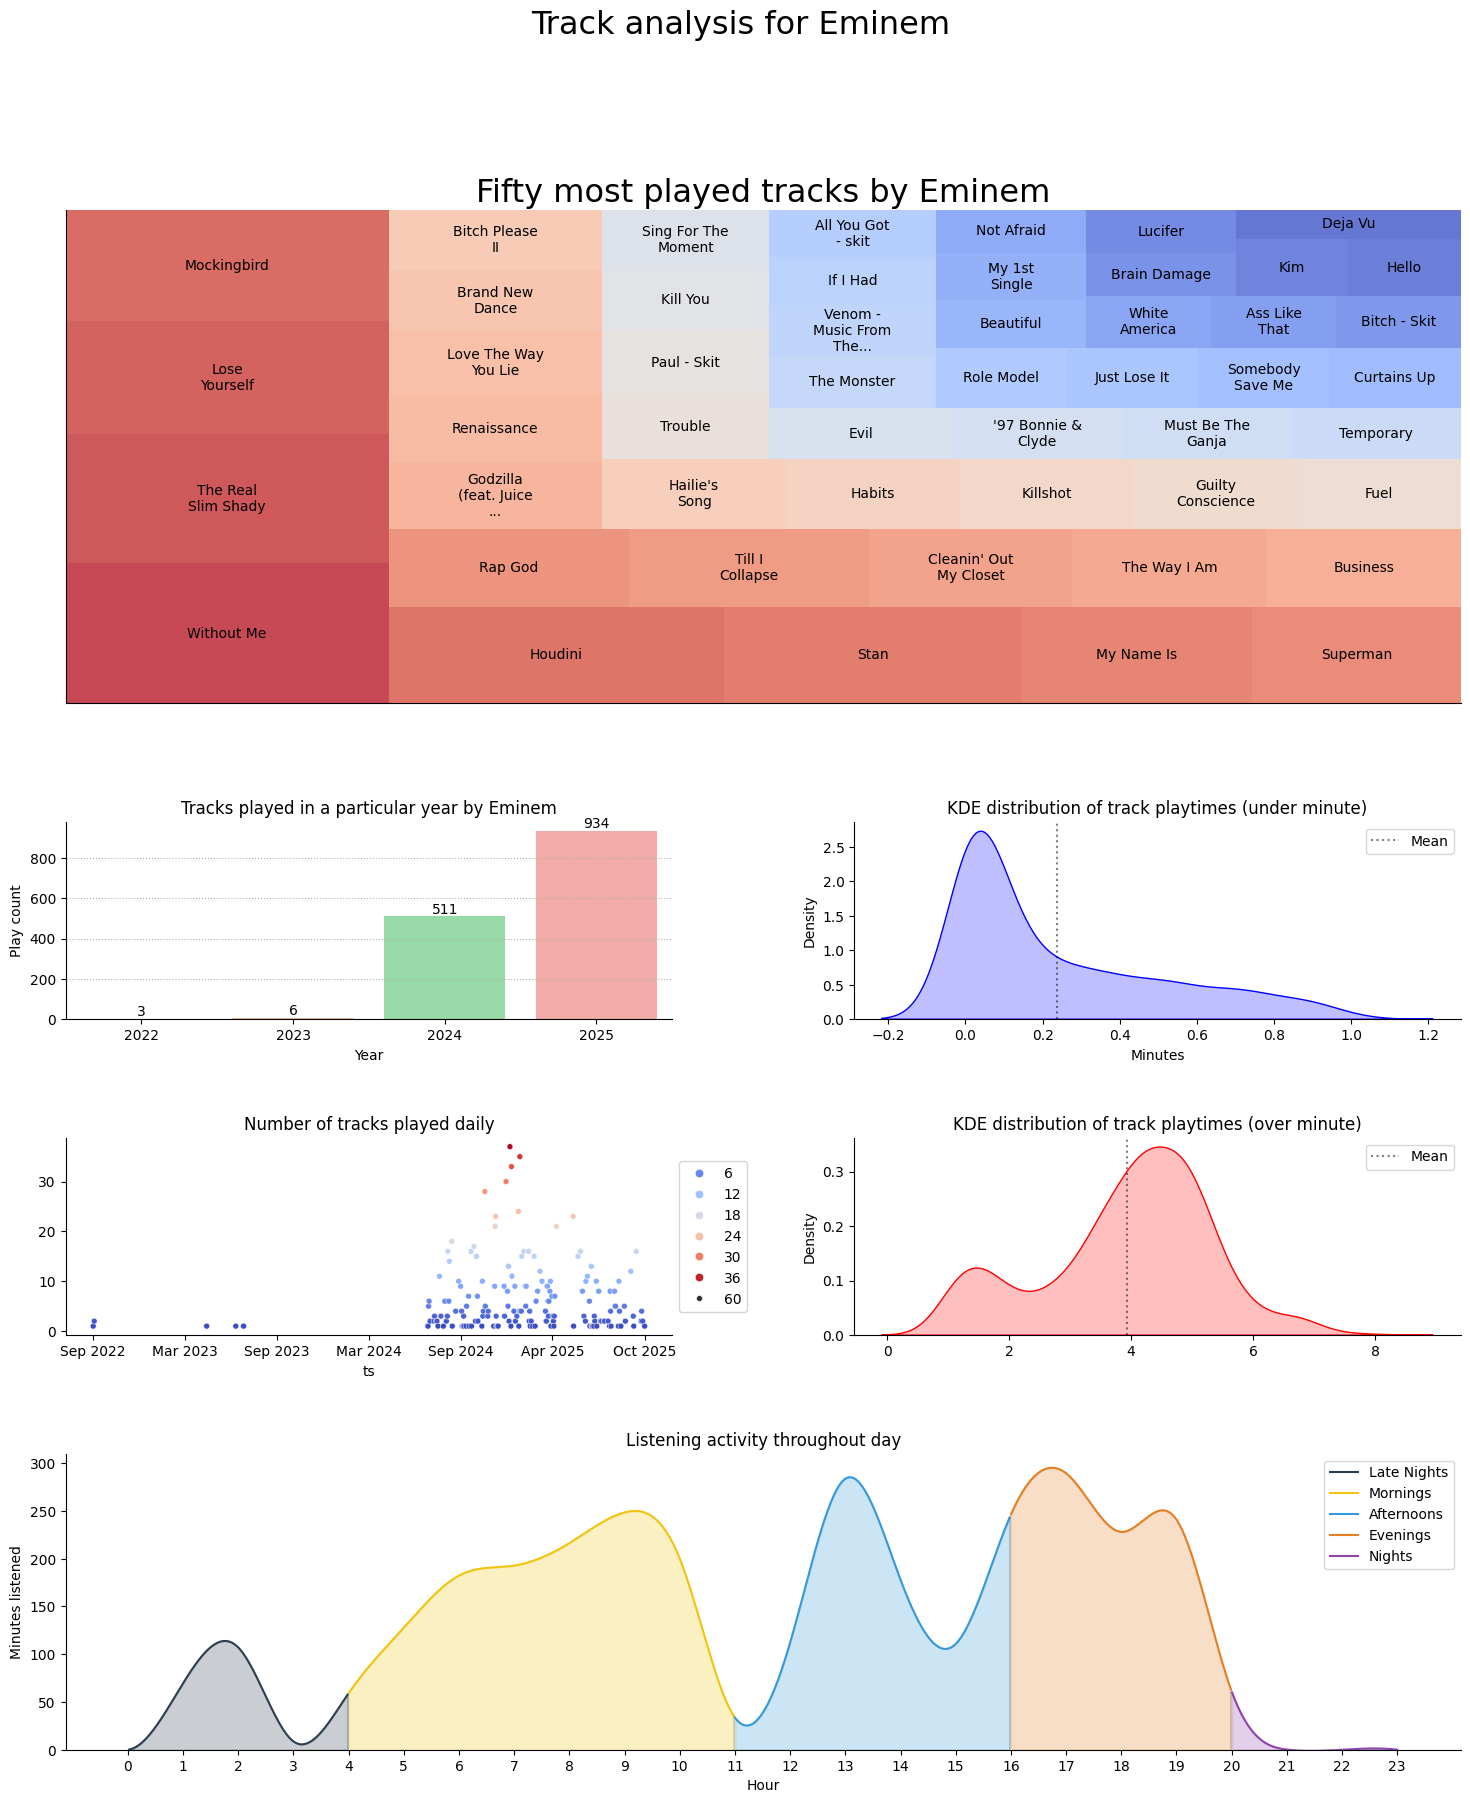

In [ ]:
from typing import cast

n = 5
top_artists = (
    df.groupby("master_metadata_album_artist_name")["ms_played"]
    .sum()
    .sort_values(ascending=False)
)

top_artists.head()

for artist_name, _ in top_artists.head(n).items():
    artist_name = cast(str, artist_name)
    Plots.analysis_per_artist(df, artist_name)
    print(" ")

/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/divij/coding/projects/spotify-data-analysis/utils/plots.py:490: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


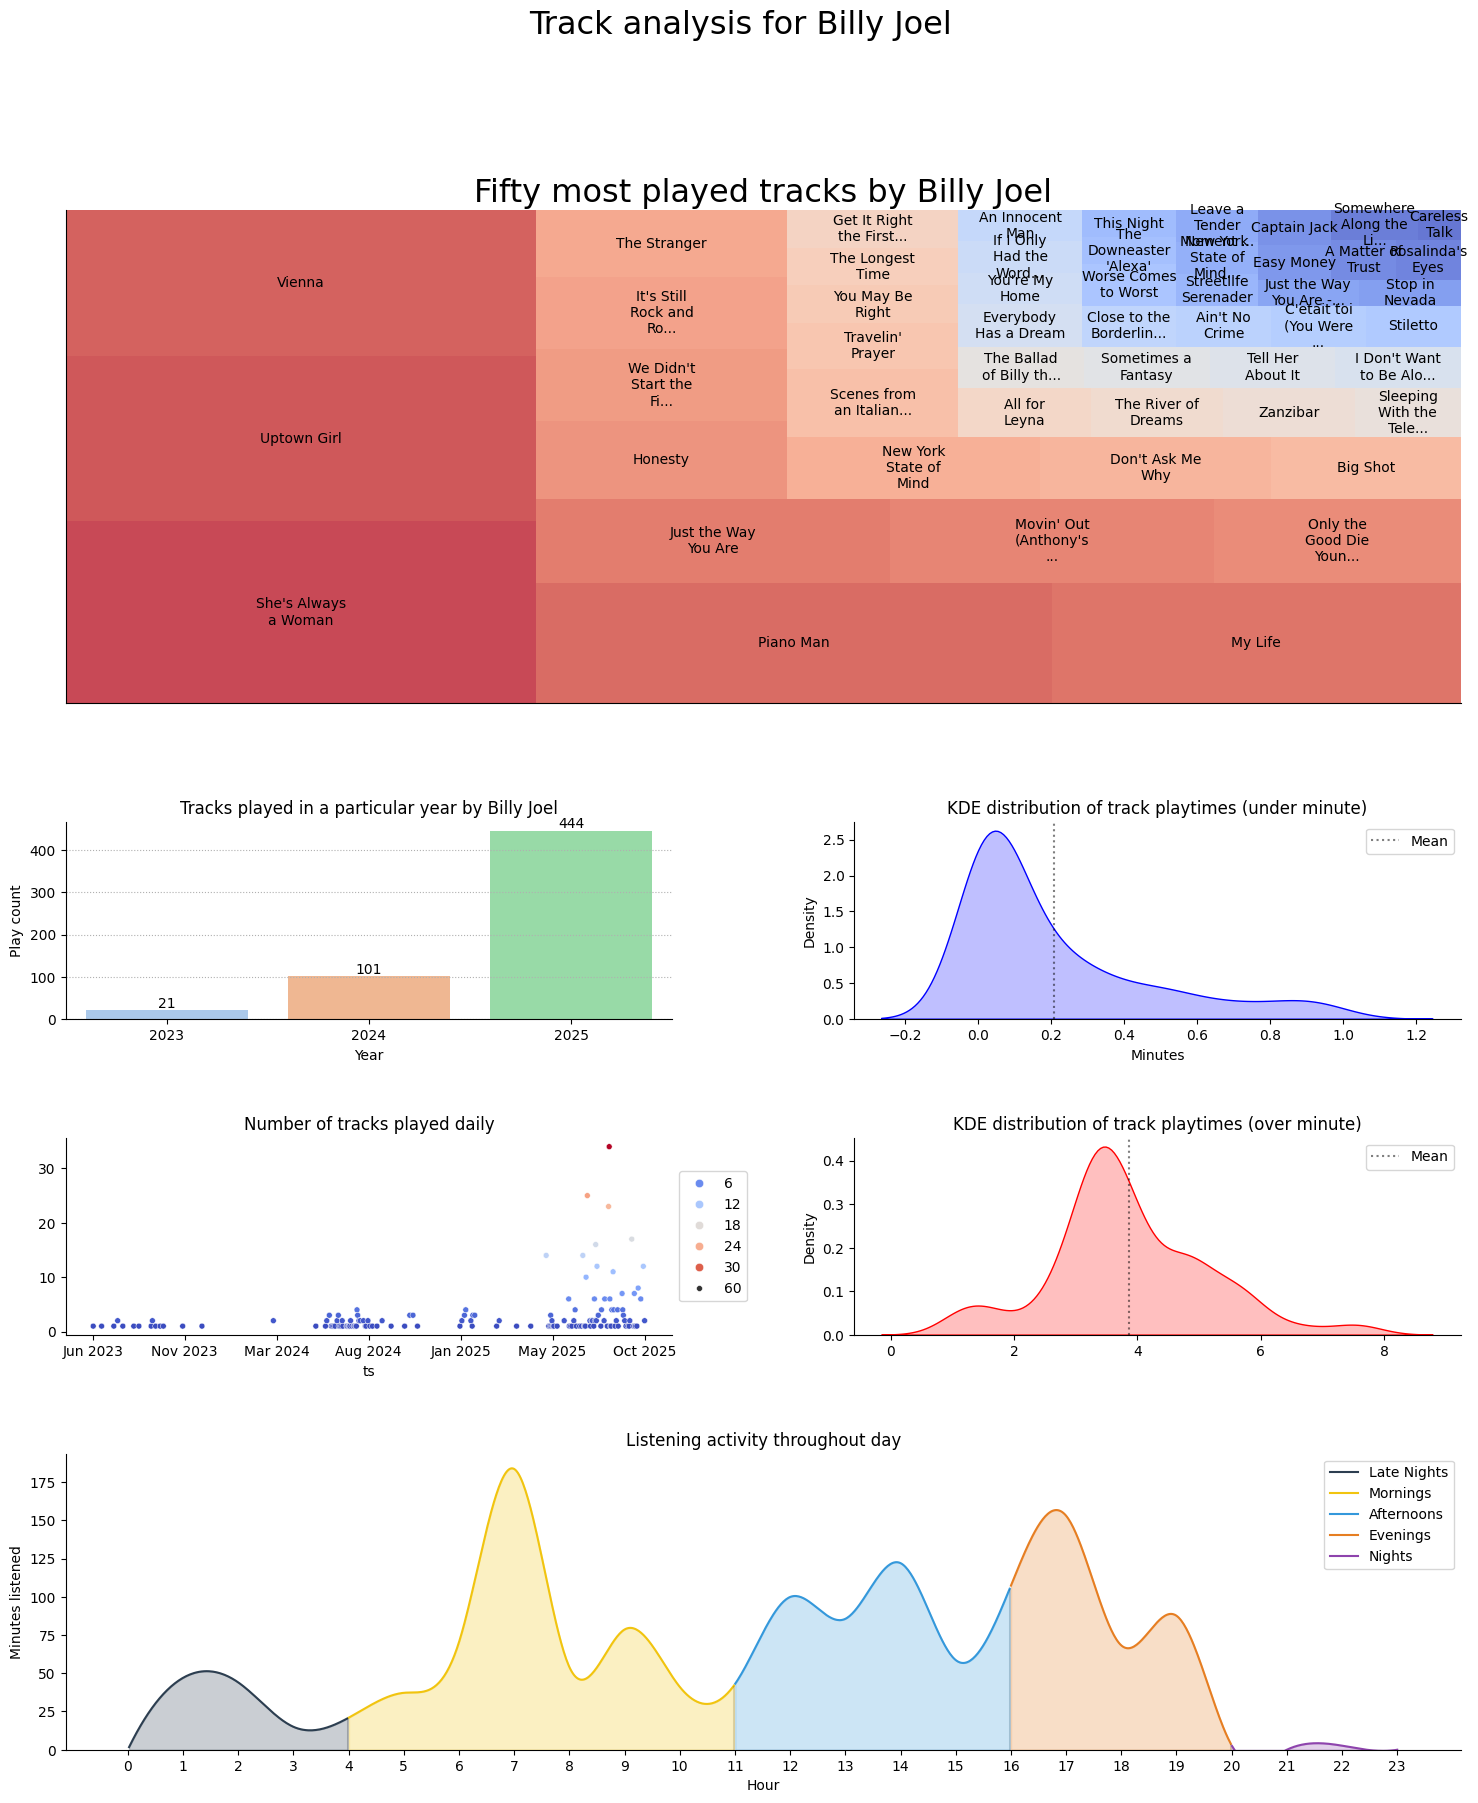

In [ ]:
Plots.analysis_per_artist(df, "Billy Joel")